<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Removing Duplicates**


Estimated time needed: **30** minutes


## Introduction


In this lab, you will focus on data wrangling, an important step in preparing data for analysis. Data wrangling involves cleaning and organizing data to make it suitable for analysis. One key task in this process is removing duplicate entries, which are repeated entries that can distort analysis and lead to inaccurate conclusions.  


## Objectives


In this lab you will perform the following:


1. Identify duplicate rows  in the dataset.
2. Use suitable techniques to remove duplicate rows and verify the removal.
3. Summarize how to handle missing values appropriately.
4. Use ConvertedCompYearly to normalize compensation data.
   


### Install the Required Libraries


In [1]:
!pip install pandas

### Step 1: Import Required Libraries


In [3]:
import pandas as pd

### Step 2: Load the Dataset into a DataFrame



load the dataset using pd.read_csv()


In [7]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

**Note: If you are working on a local Jupyter environment, you can use the URL directly in the <code>pandas.read_csv()</code>  function as shown below:**



#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


### Step 3: Identifying Duplicate Rows


**Task 1: Identify Duplicate Rows**
  1. Count the number of duplicate rows in the dataset.
  2. Display the first few duplicate rows to understand their structure.


In [8]:
# Count the number of duplicate rows
duplicate_count = df.duplicated().sum()

# Display the first few duplicate rows
duplicate_rows = df[df.duplicated()]

print(f"Number of duplicate rows: {duplicate_count}")
print("First few duplicate rows:")
print(duplicate_rows.head())


Number of duplicate rows: 0
First few duplicate rows:
Empty DataFrame
Columns: [ResponseId, MainBranch, Age, Employment, RemoteWork, Check, CodingActivities, EdLevel, LearnCode, LearnCodeOnline, TechDoc, YearsCode, YearsCodePro, DevType, OrgSize, PurchaseInfluence, BuyNewTool, BuildvsBuy, TechEndorse, Country, Currency, CompTotal, LanguageHaveWorkedWith, LanguageWantToWorkWith, LanguageAdmired, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, DatabaseAdmired, PlatformHaveWorkedWith, PlatformWantToWorkWith, PlatformAdmired, WebframeHaveWorkedWith, WebframeWantToWorkWith, WebframeAdmired, EmbeddedHaveWorkedWith, EmbeddedWantToWorkWith, EmbeddedAdmired, MiscTechHaveWorkedWith, MiscTechWantToWorkWith, MiscTechAdmired, ToolsTechHaveWorkedWith, ToolsTechWantToWorkWith, ToolsTechAdmired, NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith, NEWCollabToolsAdmired, OpSysPersonal use, OpSysProfessional use, OfficeStackAsyncHaveWorkedWith, OfficeStackAsyncWantToWorkWith, OfficeStackAsyncAdmi

### Step 4: Removing Duplicate Rows


**Task 2: Remove Duplicates**
   1. Remove duplicate rows from the dataset using the drop_duplicates() function.
2. Verify the removal by counting the number of duplicate rows after removal .


In [9]:
# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Verify the removal by counting the number of duplicate rows after removal
duplicate_count_after_removal = df_cleaned.duplicated().sum()

# Print the result
print(f"Number of duplicate rows after removal: {duplicate_count_after_removal}")

Number of duplicate rows after removal: 0


### Step 5: Handling Missing Values


**Task 3: Identify and Handle Missing Values**
   1. Identify missing values for all columns in the dataset.
   2. Choose a column with significant missing values (e.g., EdLevel) and impute with the most frequent value.


In [11]:

missing_values = df.isnull().sum()

# Display the missing values count
print("Missing values in each column:")
print(missing_values)

# Choose the column with significant missing values, for example 'EdLevel'
# Impute missing values with the most frequent value (mode)
most_frequent_value = df['EdLevel'].mode()[0]

# Impute the missing values in the 'EdLevel' column without using inplace=True
df['EdLevel'] = df['EdLevel'].fillna(most_frequent_value)

# Verify the imputation by checking the missing values again
missing_values_after_imputation = df['EdLevel'].isnull().sum()

print(f"Missing values in 'EdLevel' after imputation: {missing_values_after_imputation}")


Missing values in each column:
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64
Missing values in 'EdLevel' after imputation: 0


### Step 6: Normalizing Compensation Data


**Task 4: Normalize Compensation Data Using ConvertedCompYearly**
   1. Use the ConvertedCompYearly column for compensation analysis as the normalized annual compensation is already provided.
   2. Check for missing values in ConvertedCompYearly and handle them if necessary.


In [15]:


# Check for missing values in the 'ConvertedCompYearly' column
missing_values_comp = df['ConvertedCompYearly'].isnull().sum()

# Display missing values count
print(f"Missing values in 'ConvertedCompYearly': {missing_values_comp}")

# Handle missing values - Impute with the median (you can choose other methods too)
if missing_values_comp > 0:
    median_compensation = df['ConvertedCompYearly'].median()
    # Impute by directly assigning the median value
    df['ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(median_compensation)

# Verify the handling by checking if any missing values remain
missing_values_comp_after = df['ConvertedCompYearly'].isnull().sum()

print(f"Missing values in 'ConvertedCompYearly' after handling: {missing_values_comp_after}")


Missing values in 'ConvertedCompYearly': 0
Missing values in 'ConvertedCompYearly' after handling: 0


### Step 7: Summary and Next Steps


**In this lab, you focused on identifying and removing duplicate rows.**

- You handled missing values by imputing the most frequent value in a chosen column.

- You used ConvertedCompYearly for compensation normalization and handled missing values.

- For further analysis, consider exploring other columns or visualizing the cleaned dataset.


/tmp/ipykernel_630/59123286.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Compensation Range'] = pd.cut(df_filtered['ConvertedCompYearly'], bins=bins, labels=labels)


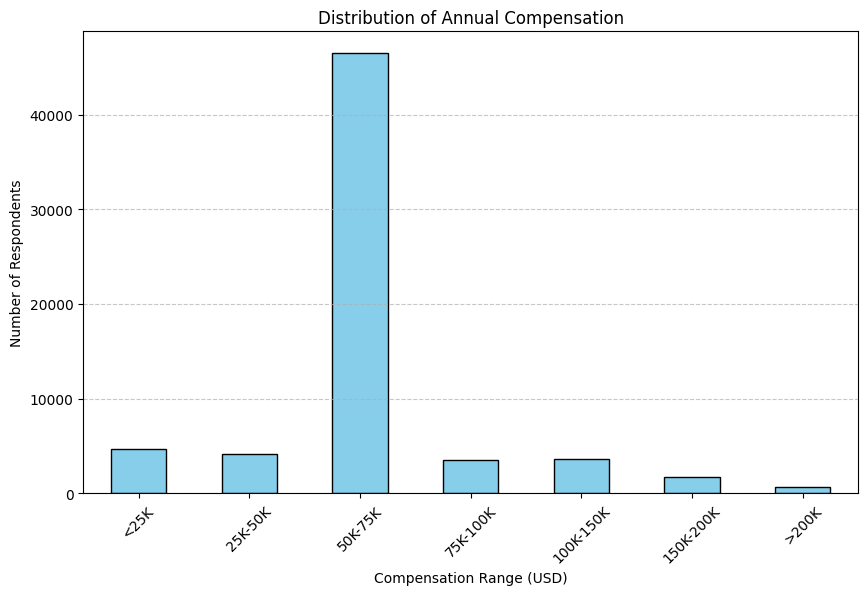

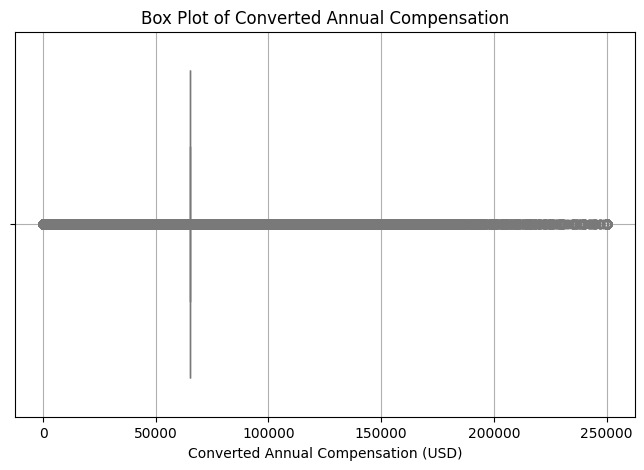

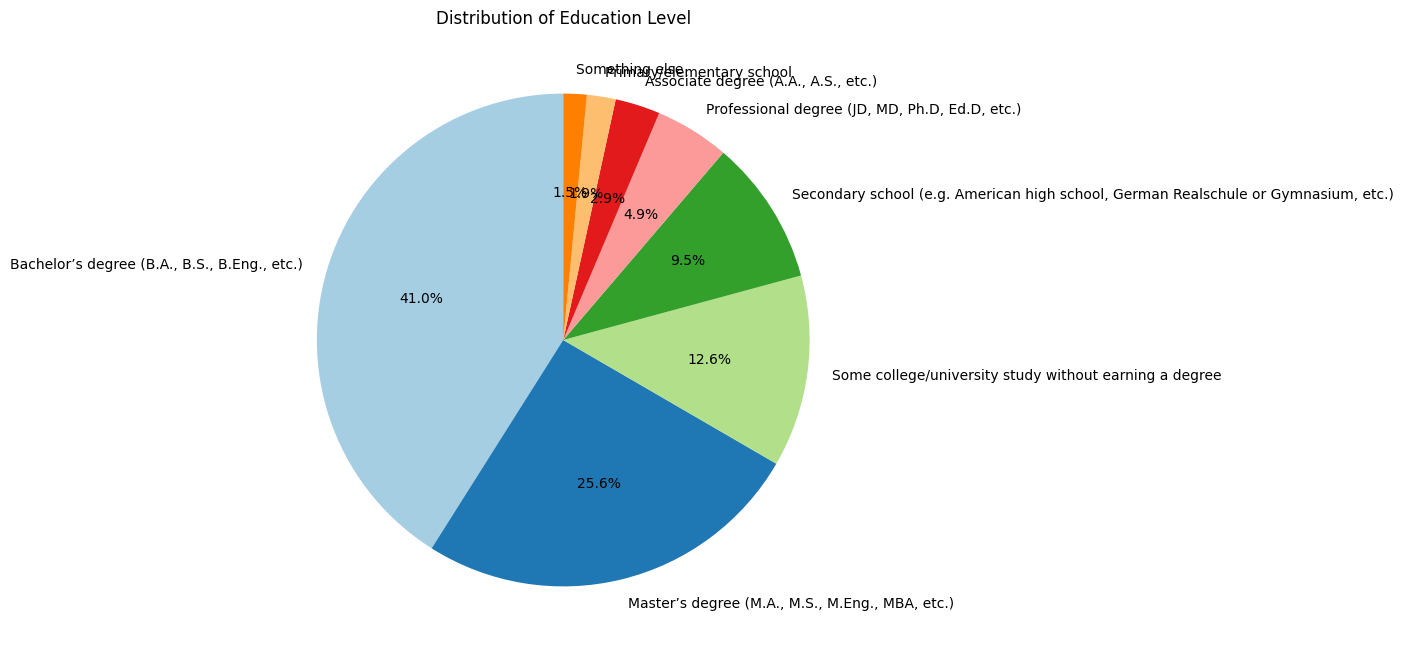

In [20]:
!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

# Handle missing values in 'ConvertedCompYearly' by imputing with the median
if df['ConvertedCompYearly'].isnull().sum() > 0:
    median_compensation = df['ConvertedCompYearly'].median()
    df['ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(median_compensation)

# Remove extreme outliers for better visualization (e.g., keep data below 99th percentile)
upper_limit = df['ConvertedCompYearly'].quantile(0.99)
df_filtered = df[df['ConvertedCompYearly'] <= upper_limit]

# Group compensation into salary bins
bins = [0, 25000, 50000, 75000, 100000, 150000, 200000, upper_limit]
labels = ["<25K", "25K-50K", "50K-75K", "75K-100K", "100K-150K", "150K-200K", ">200K"]
df_filtered['Compensation Range'] = pd.cut(df_filtered['ConvertedCompYearly'], bins=bins, labels=labels)

# Visualization 1: Bar chart for grouped salary ranges
plt.figure(figsize=(10, 6))
df_filtered['Compensation Range'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Annual Compensation')
plt.xlabel('Compensation Range (USD)')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualization 2: Box plot to show compensation distribution
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_filtered['ConvertedCompYearly'], color='lightblue')
plt.title('Box Plot of Converted Annual Compensation')
plt.xlabel('Converted Annual Compensation (USD)')
plt.grid(True)
plt.show()


# Visualization 2: Pie chart for the distribution of 'EdLevel' (education level)
education_level_counts = df['EdLevel'].value_counts()

plt.figure(figsize=(8, 8))
education_level_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Education Level')
plt.ylabel('')  # Remove the ylabel for better readability
plt.show()


<!--
## Change Log

|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11-05|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|

--!>


Copyright © IBM Corporation. All rights reserved.
